In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\User\Desktop\Bootcamp\M2\Project\Data\ElectricCarData_Clean.csv')
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [3]:
df.isna().sum() # NO Nulls

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [4]:
brand_names = df['Brand'].unique() # Takes only brands mentioned and does not repeat them
print(brand_names)

['Tesla ' 'Volkswagen ' 'Polestar ' 'BMW ' 'Honda ' 'Lucid ' 'Peugeot '
 'Audi ' 'Mercedes ' 'Nissan ' 'Hyundai ' 'Porsche ' 'MG ' 'Mini ' 'Opel '
 'Skoda ' 'Volvo ' 'Kia ' 'Renault ' 'Mazda ' 'Lexus ' 'CUPRA ' 'SEAT '
 'Lightyear ' 'Aiways ' 'DS ' 'Citroen ' 'Jaguar ' 'Ford ' 'Byton '
 'Sono ' 'Smart ' 'Fiat ']


In [5]:
interest = df[['Brand', 'Model', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm']] # data im interested in

# I clearly have a lot of brands and more models of each brand, 
# perhaps its best I see which model of each brand has the highest of teach oclumn?

In [6]:
max_interest = interest.groupby('Brand').agg({'TopSpeed_KmH': 'max', 'Range_Km': 'max', 'Efficiency_WhKm': 'max'}).sort_values(by='TopSpeed_KmH')

max_interest_tail = max_interest.tail(10)
print(max_interest_tail)

           TopSpeed_KmH  Range_Km  Efficiency_WhKm
Brand                                             
Byton               190       400              244
Nissan              200       440              232
Jaguar              200       365              232
BMW                 200       450              206
Mercedes            200       370              273
Polestar            210       400              181
Audi                240       425              270
Lucid               250       610              180
Porsche             260       425              223
Tesla               410       970              267


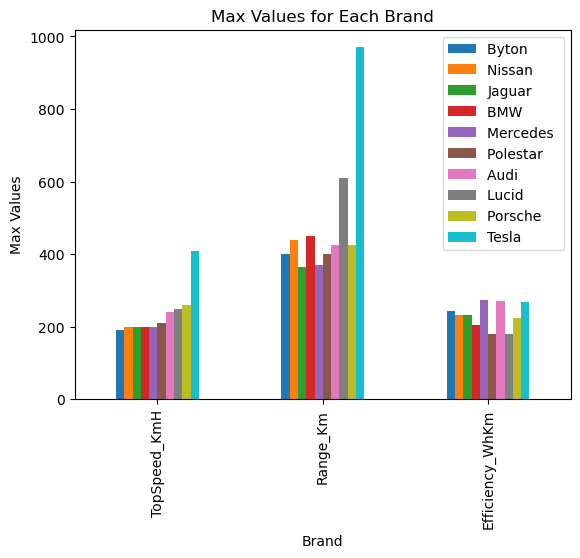

In [12]:
import matplotlib.pyplot as plt
max_interest_transposed = max_interest_tail.transpose()# Transpose the DataFrame to have 'Brand' as columns and max values as rows
max_interest_transposed.plot(kind='bar')# Create a bar graph

plt.xlabel('Brand')# Add labels and title
plt.ylabel('Max Values')
plt.title('Max Values for Each Brand')
plt.legend()
plt.show()

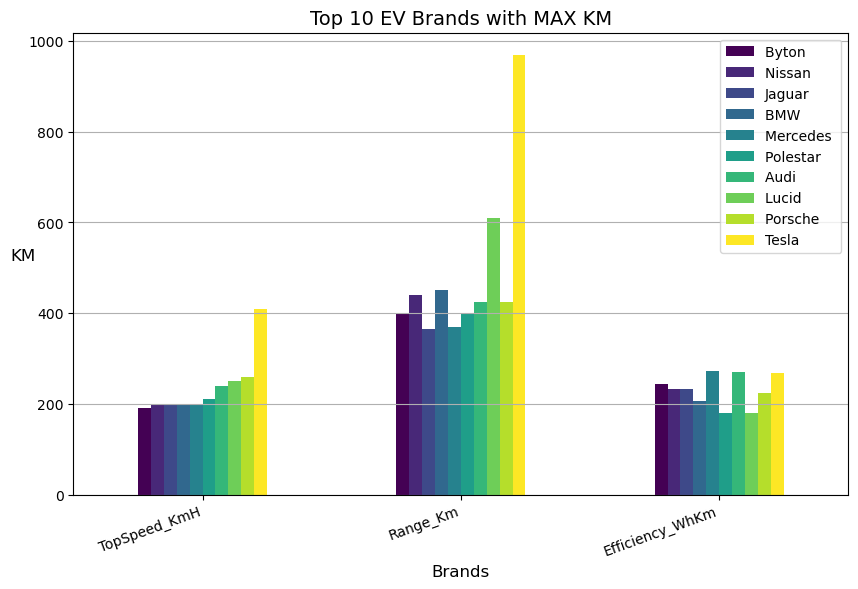

In [98]:
#Lets show which brands have the cars with the best range, we'll find out the car model next.
ax = max_interest_transposed.plot(kind='bar', figsize=(10, 6), colormap='viridis') # Create a bar graph

# Improve labels and title
plt.xlabel('Brands', fontsize=12)
plt.ylabel('KM', fontsize=12, rotation=0)
plt.title('Top 10 EV Brands with MAX KM', fontsize=14)

plt.xticks(rotation=20, ha='right') # Rotate x-axis labels for readability
ax.legend(title='') # Remove legend title WHICH SAYS BRAND
plt.grid(axis='y', linestyle='-') # Add grid lines
plt.show()


In [83]:
# Now lets see the car models for the tail end of these brands
interest


,Brand,Model,TopSpeed_KmH,Range_Km,Efficiency_WhKm
0,Tesla,Model 3 Long Range Dual Motor,233,450,161
1,Volkswagen,ID.3 Pure,160,270,167
2,Polestar,2,210,400,181
3,BMW,iX3,180,360,206
4,Honda,e,145,170,168
...,...,...,...,...,...
98,Nissan,Ariya 63kWh,160,330,191
99,Audi,e-tron S Sportback 55 quattro,210,335,258
100,Nissan,Ariya e-4ORCE 63kWh,200,325,194
101,Nissan,Ariya e-4ORCE 87kWh Performance,200,375,232


In [94]:
# Spesifify model and range categories only
top_10_models = interest.sort_values('Range_Km', ascending=False).head(10)
top_10_models = top_10_models.drop(['Efficiency_WhKm', 'TopSpeed_KmH'], axis=1)
top_10_models

,Brand,Model,Range_Km
51,Tesla,Roadster,970
33,Tesla,Cybertruck Tri Motor,750
5,Lucid,Air,610
48,Lightyear,One,575
40,Tesla,Model S Long Range,515
59,Tesla,Model S Performance,505
67,Tesla,Cybertruck Dual Motor,460
13,BMW,i4,450
64,Ford,Mustang Mach-E ER RWD,450
54,Tesla,Model X Long Range,450


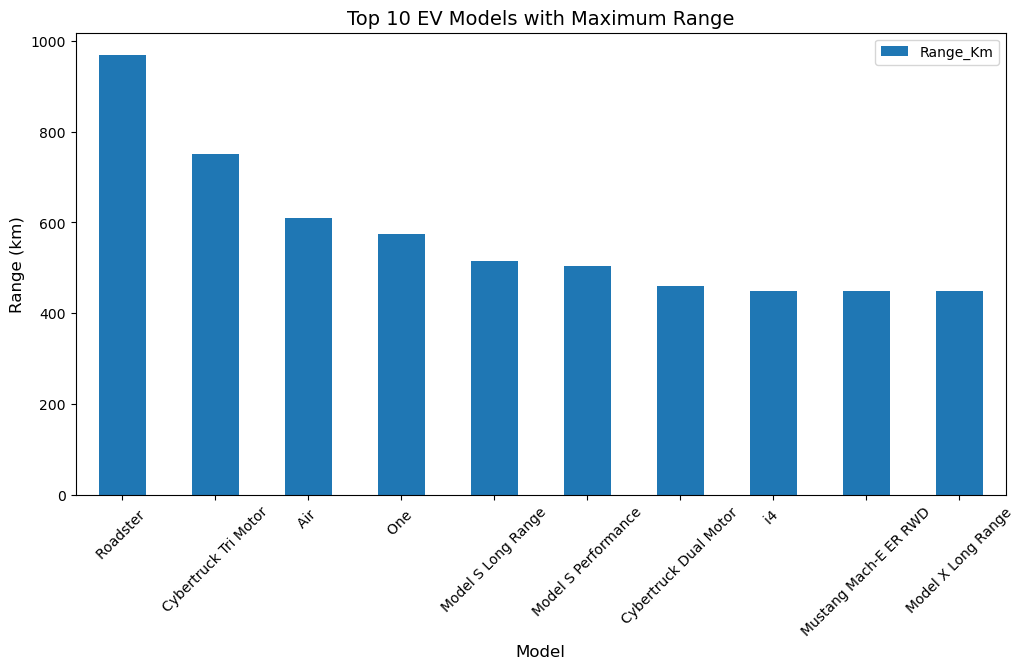

In [99]:
top_10_models.plot(kind='bar', x='Model', y='Range_Km', figsize=(12, 6), rot=45)

# Add labels and title
plt.xlabel('Model', fontsize=12)
plt.ylabel('Range (km)', fontsize=12)
plt.title('Top 10 EV Models with Maximum Range', fontsize=14)
plt.show()
